# Imports necessários

In [1]:
import numpy as np

import matplotlib.pyplot as plt

import sympy as sp

import pandas as pd

# Le arquivos do csv

In [3]:
df = pd.read_csv("co2_mensal.csv")
df.head()

,#mes,Ano,Mes,CO2
0,1,2000,1,369.05
1,2,2000,2,369.37
2,3,2000,3,370.42
3,4,2000,4,371.57
4,5,2000,5,371.74


In [6]:
df.CO2 * df.Ano - 2000

0      736100.00
1      736740.00
2      738840.00
3      741140.00
4      741480.00
         ...    
277    848327.59
278    848691.73
279    853182.79
280    855306.94
281    854517.97
Length: 282, dtype: float64

# Plotagem do gráfico de dispersão

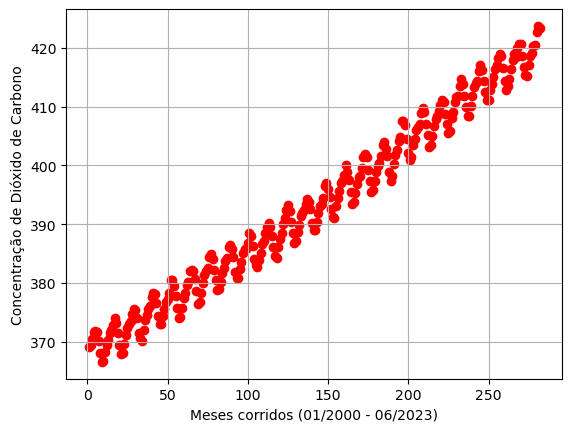

In [31]:
meses_corridos = np.linspace(1, len(df), num=len(df), dtype=int)

plt.scatter(meses_corridos, df.CO2, color="r")
plt.grid()
plt.xlabel("Meses corridos (01/2000 - 06/2023)")
plt.ylabel("Concentração de Dióxido de Carbono")
plt.show()

# Letra A

## Calculando coeficientes

In [34]:
import numpy as np

# Inicializar listas para as funções de base
fi_0 = [1 for _ in range(len(meses_corridos))]
fi_1 = meses_corridos
fi_2 = [np.cos(2 * np.pi * mes) for mes in meses_corridos]
fi_3 = [np.sin(2 * np.pi * mes) for mes in meses_corridos]
F = df.CO2

# Construir a matriz A
A = np.array(
    [
        [
            np.dot(fi_0, fi_0),
            np.dot(fi_0, fi_1),
            np.dot(fi_0, fi_2),
            np.dot(fi_0, fi_3),
        ],
        [
            np.dot(fi_1, fi_0),
            np.dot(fi_1, fi_1),
            np.dot(fi_1, fi_2),
            np.dot(fi_1, fi_3),
        ],
        [
            np.dot(fi_2, fi_0),
            np.dot(fi_2, fi_1),
            np.dot(fi_2, fi_2),
            np.dot(fi_2, fi_3),
        ],
        [
            np.dot(fi_3, fi_0),
            np.dot(fi_3, fi_1),
            np.dot(fi_3, fi_2),
            np.dot(fi_3, fi_3),
        ],
    ]
)

# Construir o vetor b
b = np.array(
    [[np.dot(F, fi_0)], [np.dot(F, fi_1)], [np.dot(F, fi_2)], [np.dot(F, fi_3)]]
)

# Resolver o sistema de equações lineares para obter os coeficientes
coef = np.linalg.solve(A, b)

# Extrair os coeficientes c1, c2, c3 e c4
c1 = coef[0][0]
c2 = coef[1][0]
c3 = coef[2][0]
c4 = coef[3][0]

print("Portanto,")
print("c1 =", c1)
print("c2 =", c2)
print("c3 =", c3)
print("c4 =", c4)

Portanto,
c1 = 6.143399216600909e+17
c2 = 1.3668680533357345e-17
c3 = -6.143399216600905e+17
c4 = -65209790567427.375


## Plotando resultados

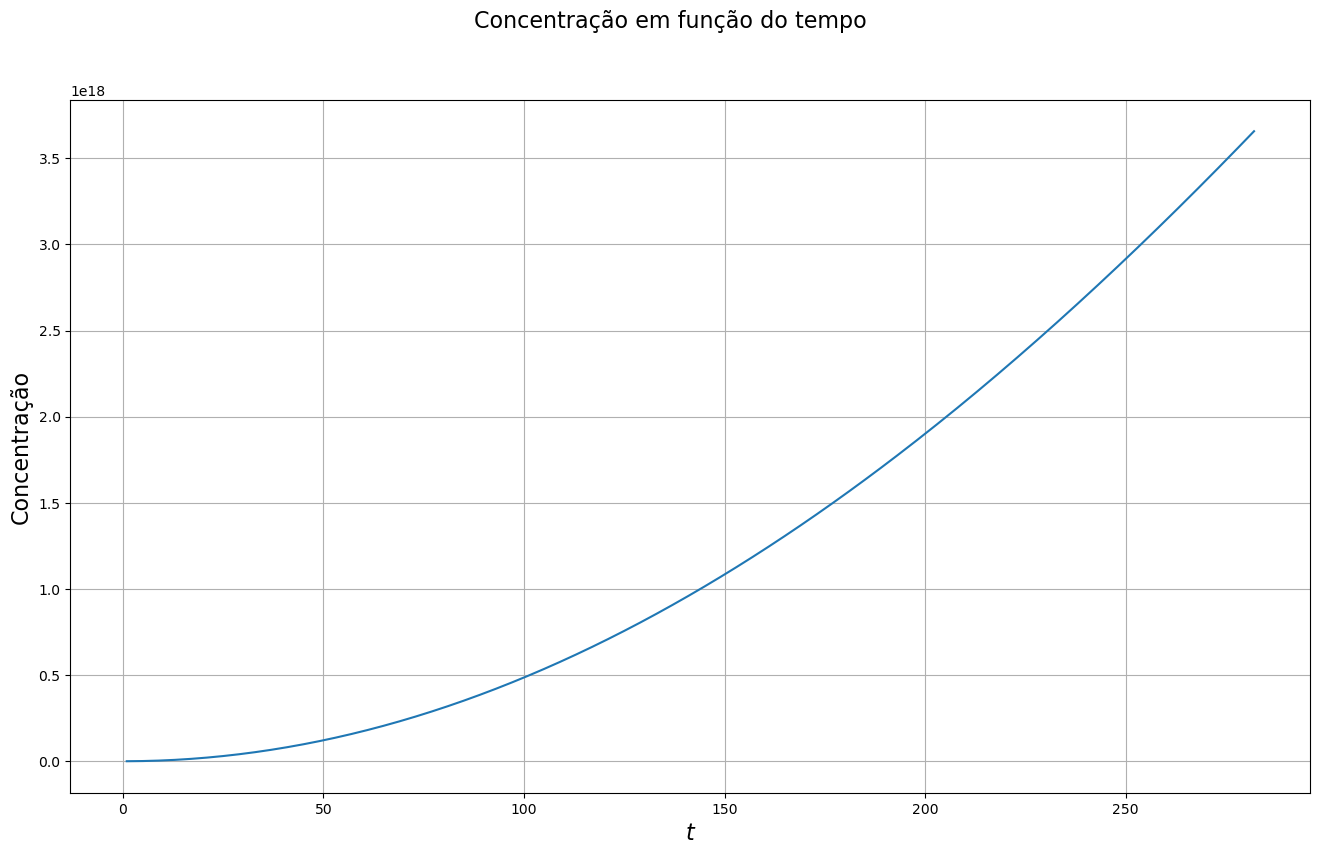

In [38]:
fig = plt.figure(figsize=[16, 9])
fig.suptitle("Concentração em função do tempo", fontsize=16)

# Plotango 3D
ax = fig.add_subplot(1, 1, 1)

x_eval = np.linspace(0, 10, num=100)
c = [
    c1 + c2 * t + c3 * np.cos(2 * 3.14 * t) + c4 * np.sin(2 * 3.14 * t)
    for t in meses_corridos
]

ax.plot(meses_corridos, c)

ax.set_ylabel("Concentração", fontsize=16)
ax.set_xlabel("$t$", fontsize=16)

# Configurar a grade no gráfico
plt.grid()

# Mostrar o gráfico
plt.show()